<a href="https://colab.research.google.com/github/aditya161989/EIP4.0/blob/master/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


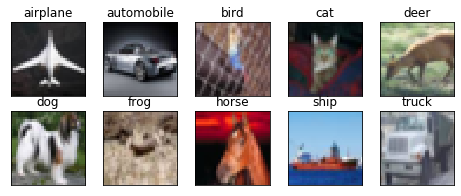

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 15s 37ms/step - loss: 1.8752 - acc: 0.2812 - val_loss: 1.4599 - val_acc: 0.4530
Epoch 2/50
390/390 [==============================] - 7s 17ms/step - loss: 1.3513 - acc: 0.5120 - val_loss: 1.0876 - val_acc: 0.6091
Epoch 3/50
390/390 [==============================] - 6s 16ms/step - loss: 1.1134 - acc: 0.6069 - val_loss: 0.9834 - val_acc: 0.6540
Epoch 4/50
390/390 [==============================] - 7s 17ms/step - loss: 0.9728 - acc: 0.6625 - val_loss: 0.8615 - val_acc: 0.6995
Epoch 5/50
390/390 [==============================] - 7s 17ms/step - loss: 0.8643 - acc: 0.7008 - val_loss: 0.8049 - val_acc: 0.7257
Epoch 6/50
390/390 [==============================] - 7s 17ms/step - loss: 0.7931 - acc: 0.7299 - val_loss: 0.7114 - val_acc: 0.7556
Epoch 7/50
390/390 [==============================] - 7s 17ms/step - loss: 0.7370 - acc: 0.7465 - val_loss: 0.6772 - val_acc: 0.7703
Epoch 8/50
390/390 [==============================] - 6s 17m

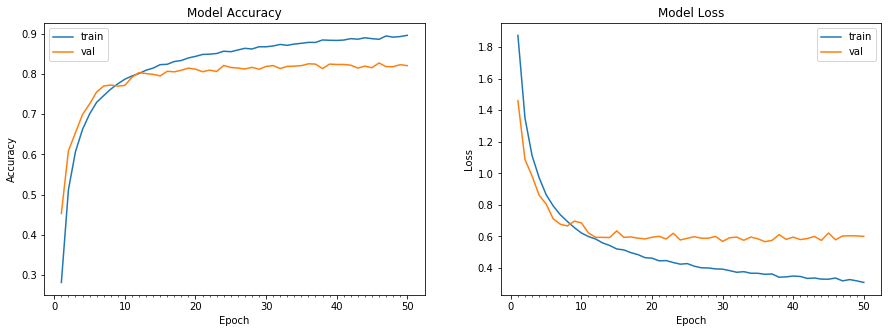

Accuracy on test data is: 82.10


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# **New Model As Per Assignment Constraints**

In [13]:
from keras import regularizers
from keras import optimizers
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout, SpatialDropout2D, UpSampling2D, GlobalAveragePooling2D, AveragePooling2D

weight_decay = 3e-3

model_new = Sequential()
model_new.add(SeparableConv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32, 32, 3)))#O = 32 , R = 3
model_new.add(Activation('relu'))
model_new.add(BatchNormalization())
model_new.add(SeparableConv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))#O = 32 , R = 5
model_new.add(Activation('relu'))
model_new.add(BatchNormalization())
model_new.add(SeparableConv2D(128, (3,3), kernel_regularizer=regularizers.l2(weight_decay)))#O = 30 , R = 7
model_new.add(Activation('relu'))
model_new.add(BatchNormalization())
model_new.add(SeparableConv2D(128, (3,3), kernel_regularizer=regularizers.l2(weight_decay)))#O = 30 , R = 9
model_new.add(Activation('relu'))
model_new.add(BatchNormalization())
model_new.add(AveragePooling2D())#O = 15 , R = 10
model_new.add(Dropout(0.1))

model_new.add(SeparableConv2D(32,1,1,kernel_regularizer=regularizers.l2(weight_decay)))#O = 15 , R = 10

model_new.add(SeparableConv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))#O = 15 , R = 14
model_new.add(Activation('relu'))
model_new.add(BatchNormalization())
model_new.add(SeparableConv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))#O = 15 , R = 18
model_new.add(Activation('relu'))
model_new.add(BatchNormalization())
model_new.add(SeparableConv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))#O = 15 , R = 22
model_new.add(Activation('relu'))
model_new.add(BatchNormalization())
model_new.add(SeparableConv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))#O = 15 , R = 26
model_new.add(Activation('relu'))
model_new.add(BatchNormalization())
model_new.add(AveragePooling2D())#O = 7 , R = 28
model_new.add(Dropout(0.3))

model_new.add(SeparableConv2D(32,1,1,kernel_regularizer=regularizers.l2(weight_decay)))#O = 7 , R = 28

model_new.add(SeparableConv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))#O = 7 , R = 36
model_new.add(Activation('relu'))
model_new.add(BatchNormalization())
model_new.add(SeparableConv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))#O = 7 , R = 44
model_new.add(Activation('relu'))
model_new.add(BatchNormalization())
model_new.add(SeparableConv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))#O = 7 , R = 52
model_new.add(Activation('relu'))
model_new.add(BatchNormalization())
# model_new.add(SeparableConv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))#7
# model_new.add(Activation('relu'))
# model_new.add(BatchNormalization())
model_new.add(AveragePooling2D())#O = 3 , R = 56
model_new.add(Dropout(0.4))

model_new.add(SeparableConv2D(32,1,1,kernel_regularizer=regularizers.l2(weight_decay)))#O = 3 , R = 56


model_new.add(SeparableConv2D(64, (3,3), kernel_regularizer=regularizers.l2(weight_decay)))#O = 1 , R = 72
model_new.add(Activation('relu'))
model_new.add(BatchNormalization())


model_new.add(SeparableConv2D(10, 1,1,kernel_regularizer=regularizers.l2(weight_decay)))
 
model_new.add(GlobalAveragePooling2D())
model_new.add(Activation('softmax'))


model_new.compile(loss='categorical_crossentropy', optimizer=SGD(momentum=0.95), metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (1, 1), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (1, 1), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (1, 1), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(10, (1, 1), kernel_regularizer=<keras.reg...)`


In [14]:
model_new.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_29 (Separab (None, 32, 32, 32)        155       
_________________________________________________________________
activation_23 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
separable_conv2d_30 (Separab (None, 32, 32, 64)        2400      
_________________________________________________________________
activation_24 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
separable_conv2d_31 (Separab (None, 30, 30, 128)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=97, epochs=50)`


Epoch 1/50
(0.009999999776482582, 0.1)

Epoch 00001: LearningRateScheduler setting learning rate to 0.1.
97/97 [==============================] - 60s 619ms/step - loss: 1.8790 - acc: 0.2920 - val_loss: 13.5606 - val_acc: 0.1418
Epoch 2/50
(0.10000000149011612, 0.16086956521739126)

Epoch 00002: LearningRateScheduler setting learning rate to 0.16086956521739126.
97/97 [==============================] - 54s 552ms/step - loss: 1.5712 - acc: 0.4181 - val_loss: 11.1686 - val_acc: 0.2135
Epoch 3/50
(0.1608695685863495, 0.22173913043478252)

Epoch 00003: LearningRateScheduler setting learning rate to 0.22173913043478252.
97/97 [==============================] - 54s 556ms/step - loss: 1.4197 - acc: 0.4800 - val_loss: 10.3449 - val_acc: 0.2689
Epoch 4/50
(0.22173912823200226, 0.2826086956521738)

Epoch 00004: LearningRateScheduler setting learning rate to 0.2826086956521738.
97/97 [==============================] - 54s 554ms/step - loss: 1.2888 - acc: 0.5315 - val_loss: 10.9104 - val_acc: 0.260

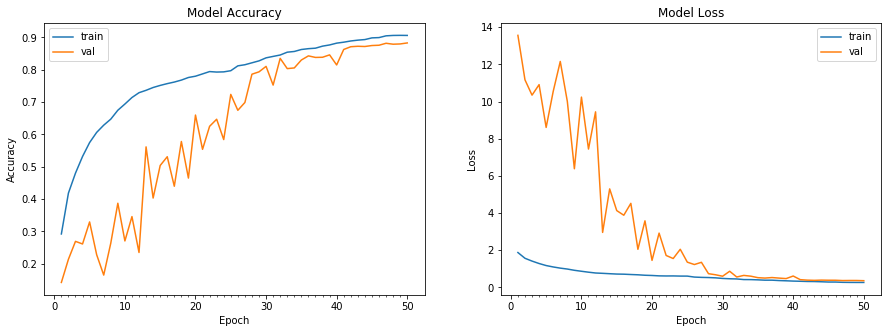

Accuracy on test data is: 88.27


In [15]:
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import LearningRateScheduler


learning_rate = []
def scheduler(epoch, lr): #Implements cyclical learning rate
  step_size = 2300 #One triangle is completed at the 46th epoch and the learning rate remains the base rate for the rest 4 epochs
  iterations = epoch * 100
  base_lr = .1 #base learning rate
  max_lr = 1.5 #max learning rate
  cycle = np.floor(1+iterations/(2*step_size))
  x = np.abs(iterations/step_size - 2*cycle + 1)
  new_lr = base_lr + (max_lr-base_lr)*np.maximum(0, (1-x))
  print((lr, new_lr))
  if(round(lr, 2) <= base_lr and epoch > 1):
    return base_lr 
  else:
    return new_lr


datagen_new = ImageDataGenerator(zoom_range=0.2, 
                             horizontal_flip=True)


datagen_new.fit(train_features)
# train the model
start = time.time()
# Train the model
model_new_info = model_new.fit_generator(datagen_new.flow(train_features, train_labels, batch_size = 512),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("New Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_new_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_new))


